# Time series analysis of the DON ETF

The time series analysis is of close price of the Wisdom Tree U.S. Midcap Dividend Fund (Ticker symbol: DON). Both the entire historical dataset is analyzed, in addition to 30, 60, 90, and 120 day intervals of the dataset. Time series analyis is significantly improved by transforming datasets to be linear in trend and stationary, the property of unconditional joint probability distribution not changing despite time shifts (i.e., mean and variance are constant throughout time). This notebook demonstrates techniques for transforming data and determing stationary of time series. 

The initial cells extract and prepare the DON close price for each date with the respective timeframes and provide graphs of close price over time 

Text(0.5, 0.98, 'DON Close Price for All Days')

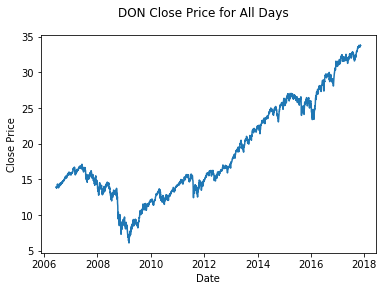

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import numpy as np
import os 
don_df = pd.read_csv('ETFS/don.us.csv')
lst_days = [30, 60, 90, 120]
start_day = 2000

def prep_df(df):
    df.columns = df.columns.str.lower()
    df.index = pd.to_datetime(df.date)
    return df

def get_start_date(df, start_day):
    day1 = datetime.datetime.strptime(df.date[0], '%Y-%m-%d')
    start_date = day1 + datetime.timedelta(days=start_day)
    return start_date

def get_end_date(initial_date, num_days):
    end_date = initial_date + timedelta(days=num_days)
    return end_date
don_all_days = prep_df(don_df)

don_all_days_close = don_all_days.close      

start_date = get_start_date(don_all_days, start_day)

end_dates_lst = [(get_end_date(start_date, i)) for i in lst_days]


plt.plot(don_all_days_close)
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.suptitle('DON Close Price for All Days')


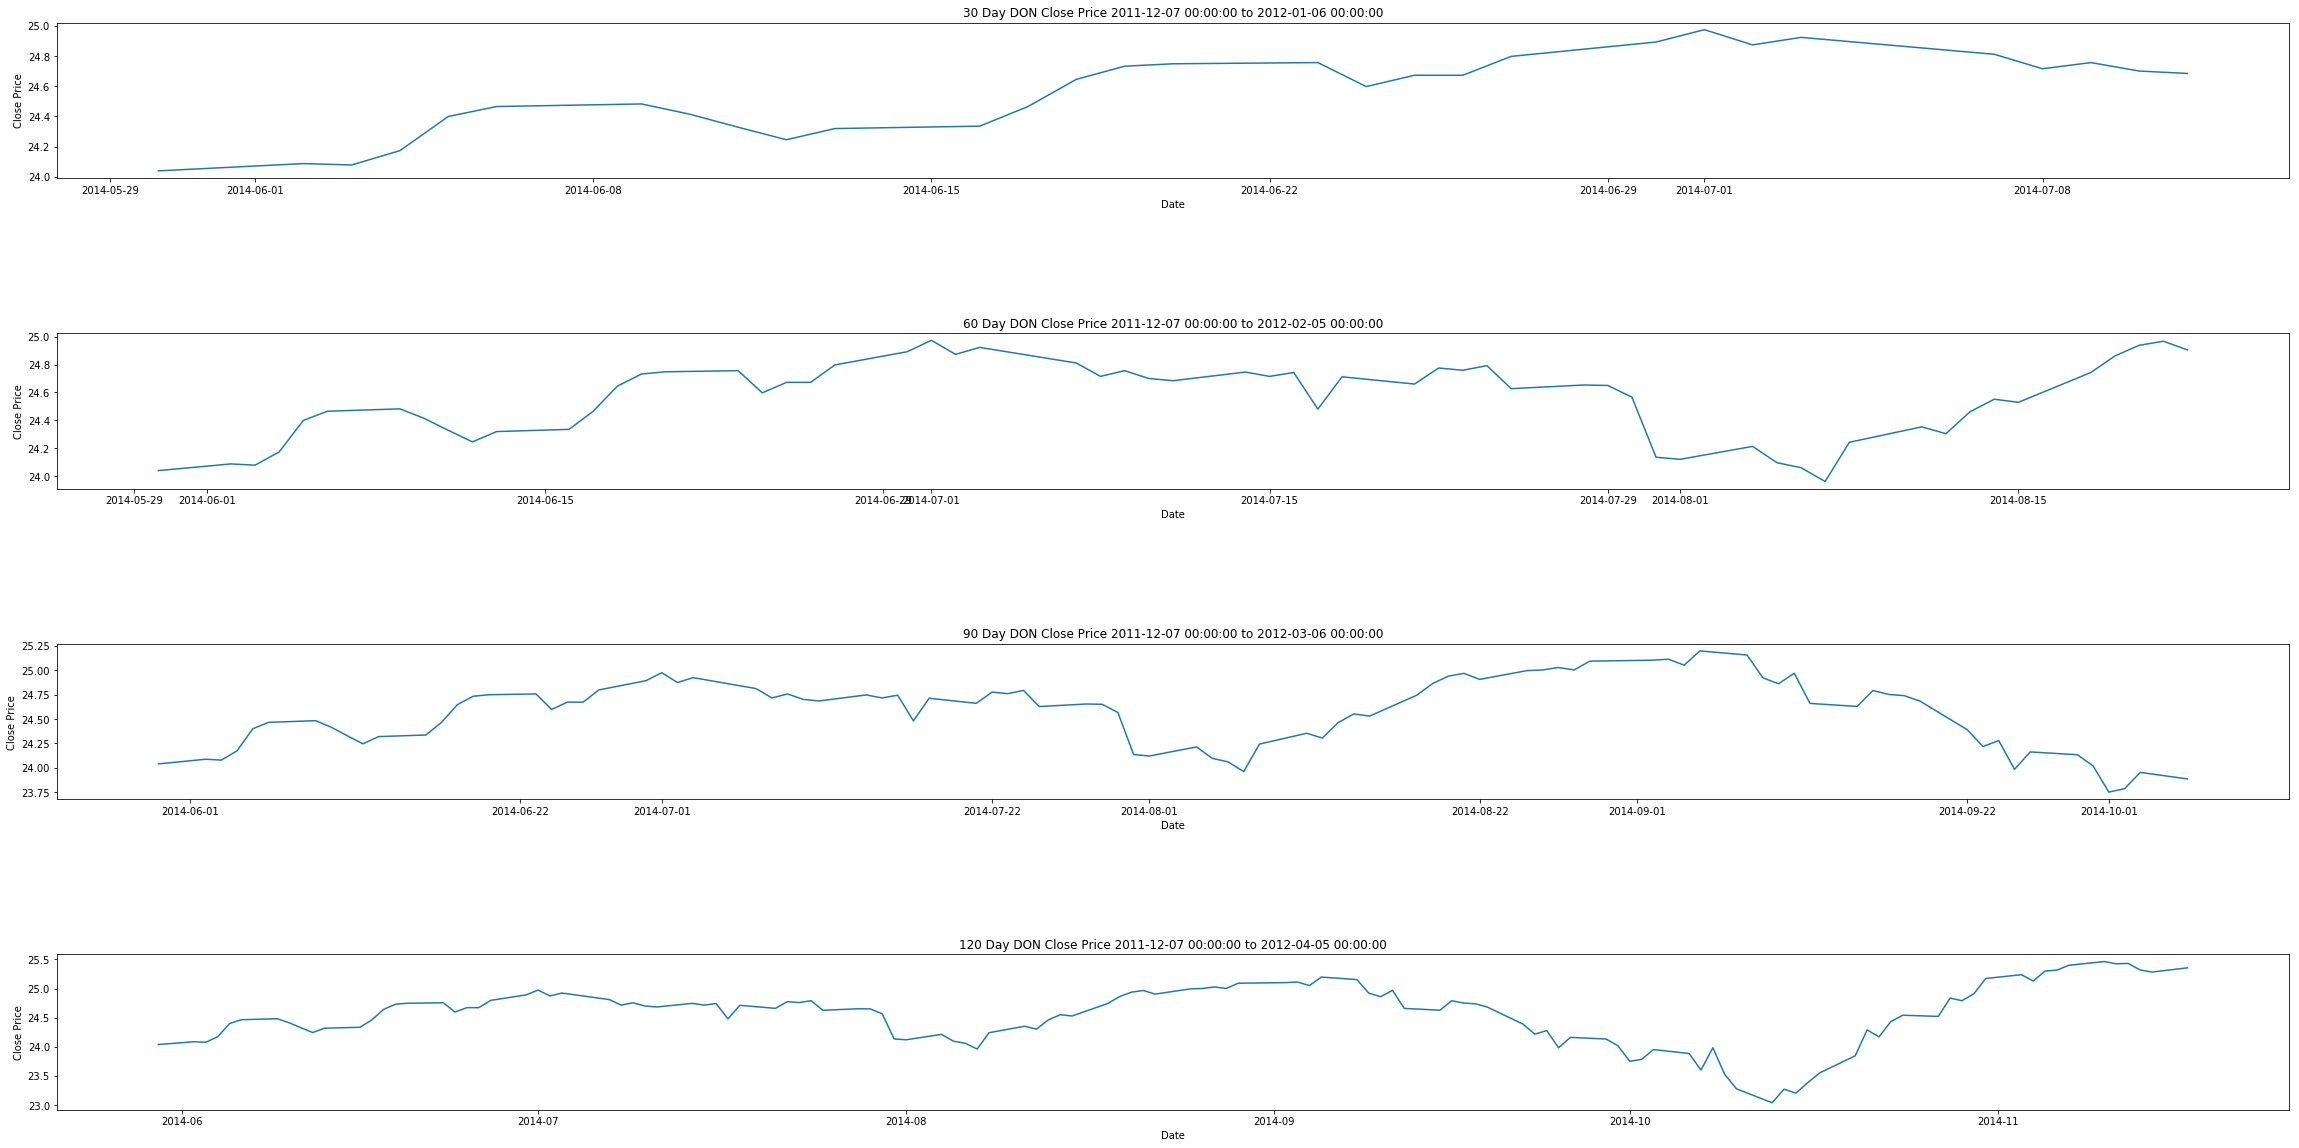

In [8]:
def get_close_prices(start_day, lst_days, df):
    dict_dfs = {}
    for i in lst_days:
        dict_dfs[i] = df.close.iloc[start_day: start_day + i]
    return dict_dfs

don_close_dict = get_close_prices(start_day, days, don_all_days)


# thirty_day, sixty_day = don_close_dict[30], don_close_dict[60]
# ninety_day, hundred_twenty_day = don_close_dict[90], don_close_dict[120]

fig, axes = plt.subplots(4, gridspec_kw={'hspace': 1, 'wspace': 1}, figsize=(40,20))
for ax in axes.flat:
    ax.set(xlabel='Date', ylabel='Close Price')

ax_num = 0
for i in lst_days:
    axes[ax_num].plot(don_close_dict[i])
    axes[ax_num].set_title(str(i) + ' Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[ax_num]))
    ax_num +=1



Observe from the above line graph and histogram that the historical data price of DON is far from stationary. This holds for the 30 day price, and while line graphtrend is less than the 60, 90, and 120 day periods, each timeseries can still lack stationary as shown by the highly non Gaussian histograms. To rigorously verify this, we shall use the Augmented Dickey-Fuller test.

The Augumeted Dickey-Fuller tests the null hypothesis that a unit root is present in the time series. If so, the time series is not stationary and transformations (logaritmic and diffrencing) should he applied. ADF is applied below to all datasets

In [20]:
from statsmodels.tsa.stattools import adfuller

def adf(df):
    aug_dickey_fuller = adfuller(df, autolag='AIC')
    df_results_all = pd.Series(aug_dickey_fuller[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in aug_dickey_fuller[4].items():
        df_results_all['Critical Value ({})'.format(key)] = value
    return df_results_all

print('ADF results for all days')
print(adf(don_all_days_close))        

print("ADF results for 30 days")
print(adf(don_close_dict[30]))

print("ADF results for 60 days")
print(adf(don_close_dict[60]))

print("ADF test 90 days")
print(adf(don_close_dict[90]))

print("ADF test 120 days")
print(adf(don_close_dict[120]))

ADF results for all days
test statistic             0.889982
p-value                    0.992958
# of lags                  5.000000
# of observations       2866.000000
Critical Value (1%)       -3.432634
Critical Value (5%)       -2.862549
Critical Value (10%)      -2.567307
dtype: float64
ADF results for 30 days
test statistic          -1.885050
p-value                  0.339126
# of lags                9.000000
# of observations       20.000000
Critical Value (1%)     -3.809209
Critical Value (5%)     -3.021645
Critical Value (10%)    -2.650713
dtype: float64
ADF results for 60 days
test statistic          -2.004225
p-value                  0.284724
# of lags                0.000000
# of observations       59.000000
Critical Value (1%)     -3.546395
Critical Value (5%)     -2.911939
Critical Value (10%)    -2.593652
dtype: float64
ADF test 90 days
test statistic          -1.527596
p-value                  0.519819
# of lags                0.000000
# of observations       89.000000
C

As the p-values of all statistics are > .10 significance level, and the absolute value of all critical values are higher than the absolute value of the test statistic for all of the datasets, none of datasets are stationary. At this point, it neccessary to transform the data via logarithms

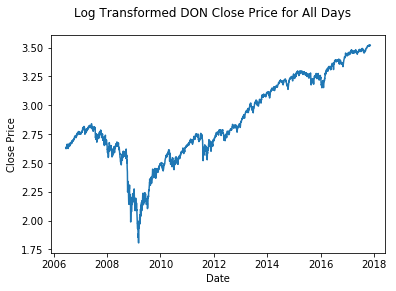

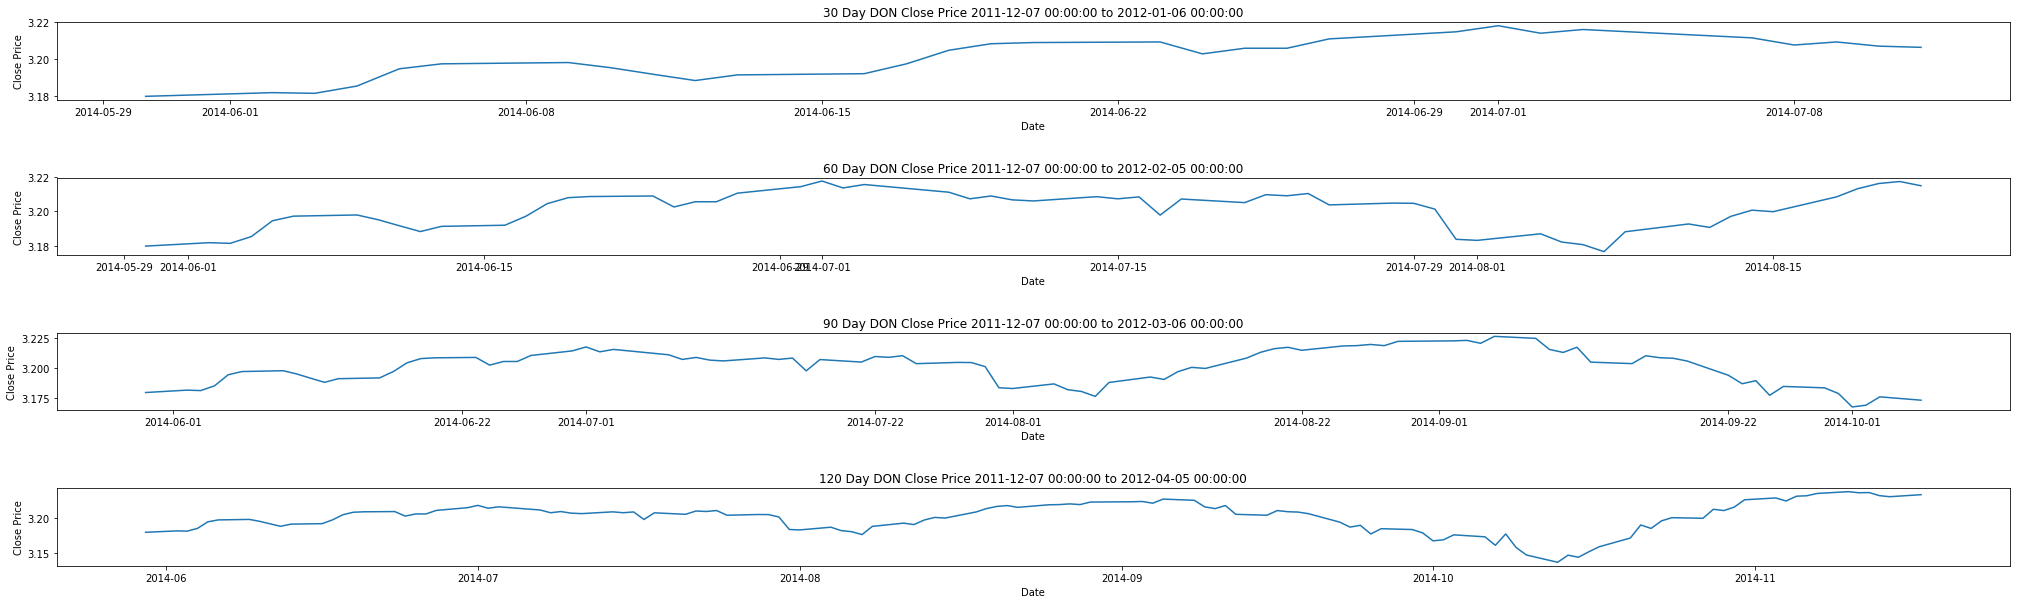

In [26]:

def log_transform(df_dict):
    log_df_dict = {}
    for i in df_dict:
        log_df_dict[i] = np.log(df_dict[i])
    return log_df_dict

don_all_days_log = np.log(don_all_days_close)
plt.plot(don_all_days_log)
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.suptitle('Log Transformed DON Close Price for All Days')

don_log_dict = log_transform(don_close_dict)
fig, axes = plt.subplots(4, gridspec_kw={'hspace': 1, 'wspace': 1}, figsize=(35,10))
for ax in axes.flat:
    ax.set(xlabel='Date', ylabel='Close Price')
    

ax_num = 0
for i in lst_days:
    axes[ax_num].plot(don_log_dict[i])
    axes[ax_num].set_title(str(i) + ' Day Log Transformed Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[ax_num]))
    ax_num +=1




Following the logarithm transformation, apply ADF once again to see if statistics have improved

In [27]:
print("ADF after log transformation")

print("all days")
print(adf(don_all_days_log))

print("30 days")
print(adf(don_log_dict[30]))

print("60 days")
print(adf(don_log_dict[60]))

print("90 days")
print(adf(don_log_dict[90]))

print("120 days")
print(adf(don_log_dict[120]))

ADF after log transformation
all days
test statistic            -0.160825
p-value                    0.943033
# of lags                 10.000000
# of observations       2861.000000
Critical Value (1%)       -3.432638
Critical Value (5%)       -2.862551
Critical Value (10%)      -2.567308
dtype: float64
30 days
test statistic          -1.882729
p-value                  0.340229
# of lags                9.000000
# of observations       20.000000
Critical Value (1%)     -3.809209
Critical Value (5%)     -3.021645
Critical Value (10%)    -2.650713
dtype: float64
60 days
test statistic          -2.013978
p-value                  0.280478
# of lags                0.000000
# of observations       59.000000
Critical Value (1%)     -3.546395
Critical Value (5%)     -2.911939
Critical Value (10%)    -2.593652
dtype: float64
90 days
test statistic          -1.524657
p-value                  0.521281
# of lags                0.000000
# of observations       89.000000
Critical Value (1%)     -3.50

Again, we find the logarithmic transform, while it did somewhat improve the p-values and test statistics, does not satisfy the constraints of stationary series. We difference the series once to find an improvement in the ADF

In [29]:
def diff_df(df_dict):
    diff_df_dict = {}
    for i in df_dict:
        diff_df_dict[i] = (df_dict[i] - df_dict[i].shift()).dropna()
    return diff_df_dict

don_all_days_diff = (don_all_days_close - don_all_days_close.shift()).dropna()
don_diff_dict = diff_df(don_log_dict)

print("ADF after log transform differencing")

print("all days")
print(adf(don_all_days_diff))

print("30 days")
print(adf(don_diff_dict[30]))

print("60 days")
print(adf(don_diff_dict[60]))

print("90 days")
print(adf(don_diff_dict[90]))

print("120 days")
print(adf(don_diff_dict[120]))


ADF after differencing
all days
test statistic           -26.083958
p-value                    0.000000
# of lags                  4.000000
# of observations       2866.000000
Critical Value (1%)       -3.432634
Critical Value (5%)       -2.862549
Critical Value (10%)      -2.567307
dtype: float64
30 days
test statistic          -1.313370
p-value                  0.623034
# of lags                5.000000
# of observations       23.000000
Critical Value (1%)     -3.752928
Critical Value (5%)     -2.998500
Critical Value (10%)    -2.638967
dtype: float64
60 days
test statistic         -7.154604e+00
p-value                 3.077926e-10
# of lags               0.000000e+00
# of observations       5.800000e+01
Critical Value (1%)    -3.548494e+00
Critical Value (5%)    -2.912837e+00
Critical Value (10%)   -2.594129e+00
dtype: float64
90 days
test statistic         -9.214694e+00
p-value                 1.847350e-15
# of lags               0.000000e+00
# of observations       8.800000e+01
Cr

Observe that the absolute value of the most of the test statistic excedes the absolute value of the 10% critical value, and test additionally provides low p-values (<0.01). Thus these time series have been made stationary. The exception to this is the 30 and 120 day samples, which still h absolute value of a test statistic lower than the absolute value of the 10% critical value (although 120 day p value <0.01). In order to rectify this, we will difference the 30 and 120 day time series once agaiN

In [35]:
non_stat_dict = {30: don_diff_dict[30], 120: don_diff_dict[120]}

dict_30_120 = diff_df(non_stat_dict)

print('ADF after log transform and twice differenced')

print("30 days")
print(adf(dict_30_120[30]))

print("120 days")
print(adf(dict_30_120[120]))



ADF after log transform and twice differenced
30 days
test statistic          -0.660611
p-value                  0.856690
# of lags                9.000000
# of observations       18.000000
Critical Value (1%)     -3.859073
Critical Value (5%)     -3.042046
Critical Value (10%)    -2.660906
dtype: float64
120 days
test statistic         -7.222591e+00
p-value                 2.092535e-10
# of lags               6.000000e+00
# of observations       1.110000e+02
Critical Value (1%)    -3.490683e+00
Critical Value (5%)    -2.887952e+00
Critical Value (10%)   -2.580857e+00
dtype: float64


The 120 day series appears to be stationary, but the 30 day dataset still lacks stationary. Instead of a logarithm transformation behind used, a square root transformation will be applied to this dataset, along with a single differencing

30 days
test statistic          -1.883483
p-value                  0.339871
# of lags                9.000000
# of observations       20.000000
Critical Value (1%)     -3.809209
Critical Value (5%)     -3.021645
Critical Value (10%)    -2.650713
dtype: float64


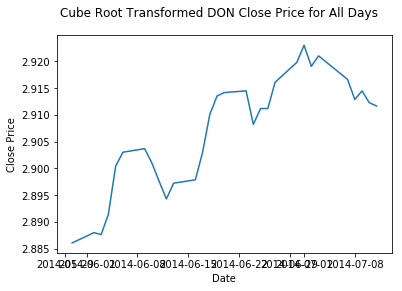

In [58]:
day_30_cbrt_transform = np.cbrt(don_close_dict[30])
plt.plot(day_30_sqrt_transform)
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.suptitle('Cube Root Transformed DON Close Price for All Days')

print("30 days")
print(adf(day_30_cbrt_transform))

Both the statistic and p-value have improved; however the absolute values of the test statistic is lower than those of the and those of the critical values. This suggests differencing may be effective. Both first and second order differencing will be attemped

In [57]:
day_30_cbrt_diff = (day_30_cbrt_transform - day_30_cbrt_transform.shift()).dropna()

day_30_cbrt_twice_diff  = (day_30_cbrt_diff  - day_30_cbrt_diff.shift()).dropna()

don_30_cbrt_diff_adf = adf(day_30_cbrt_diff )
print('30 Day DON Sqrt Transformed Single Differenced ADF')
print(don_30_cbrt_diff_adf)


don_30_cbrt_twice_diff = adf(day_30_cbrt_diff )
print('30 Day DON Sqrt Transformed Twice Differenced ADF')
print(don_30_cbrt_diff_adf)



30 Day DON Sqrt Transformed Single Differenced ADF
test statistic          -1.312607
p-value                  0.623385
# of lags                5.000000
# of observations       23.000000
Critical Value (1%)     -3.752928
Critical Value (5%)     -2.998500
Critical Value (10%)    -2.638967
dtype: float64
30 Day DON Sqrt Transformed Twice Differenced ADF
test statistic          -1.312607
p-value                  0.623385
# of lags                5.000000
# of observations       23.000000
Critical Value (1%)     -3.752928
Critical Value (5%)     -2.998500
Critical Value (10%)    -2.638967
dtype: float64


Observe that even higher order differencing and multiple transformations cannot make this dataset stationary. There are, of course tools to improve this, such as taking a more explicit Gaussian approach to transforming the data. The final graphs of the transformed data are given below 

Text(0.5, 1.0, '30 Day Twice Differenced Cube Root Transformed Day DON Close Price 2011-12-07 00:00:00 to 2012-01-06 00:00:00')

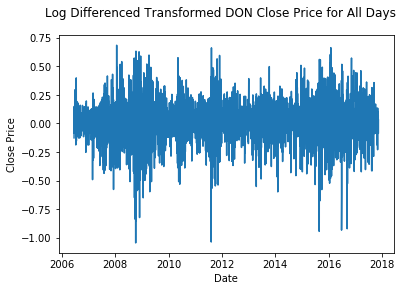

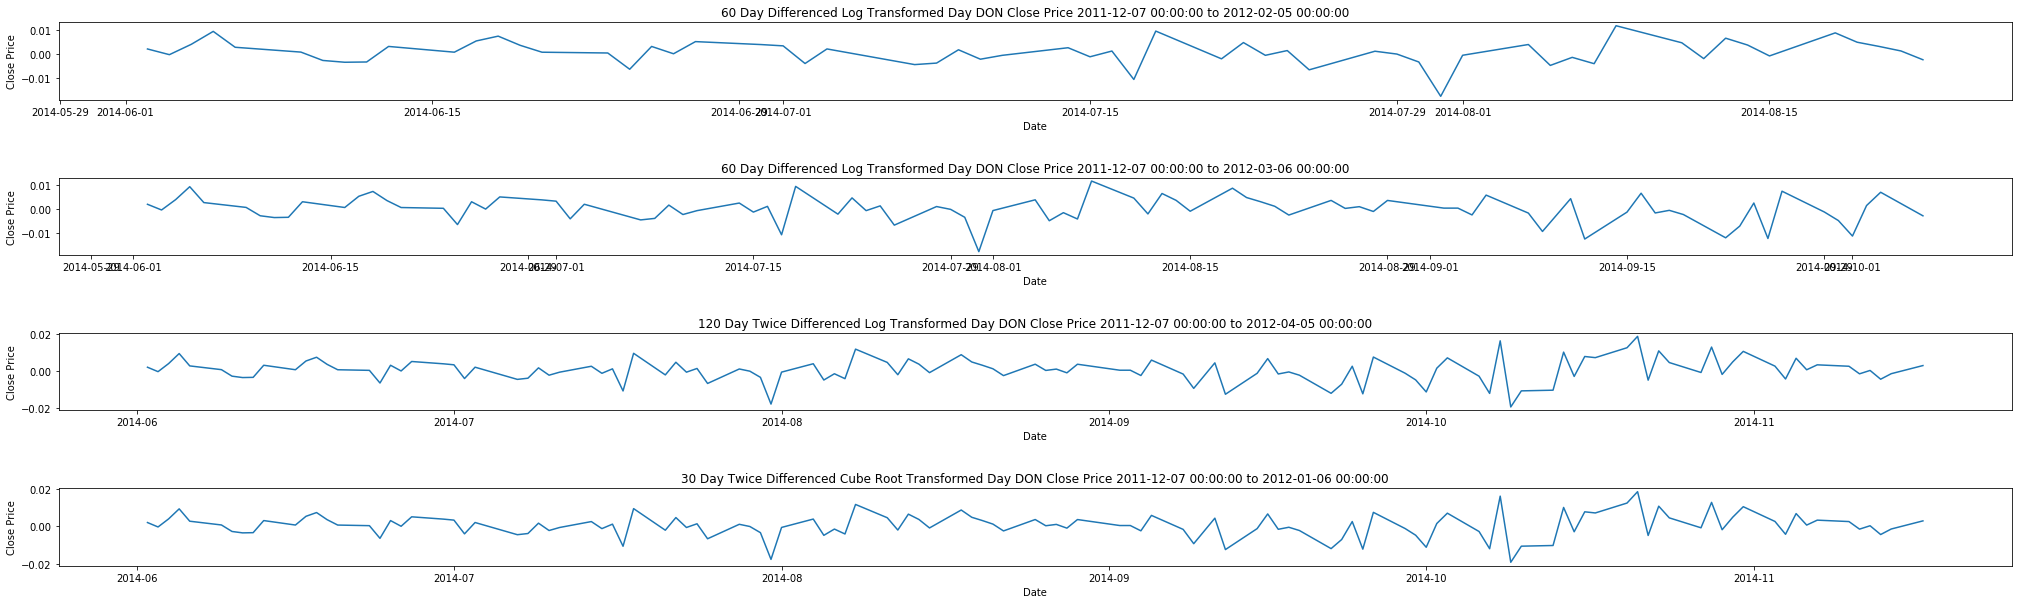

In [64]:
plt.plot(don_all_days_diff)
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.suptitle('Log Differenced Transformed DON Close Price for All Days')


fig, axes = plt.subplots(4, gridspec_kw={'hspace': 1, 'wspace': 1}, figsize=(35,10))
for ax in axes.flat:
    ax.set(xlabel='Date', ylabel='Close Price')
    
axes[0].plot(don_diff_dict[60])
axes[0].set_title('60 Day Differenced Log Transformed Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[1]))

axes[1].plot(don_diff_dict[90])
axes[1].set_title('60 Day Differenced Log Transformed Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[2]))

axes[2].plot(don_diff_dict[120])
axes[2].set_title('120 Day Twice Differenced Log Transformed Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[3]))

axes[3].plot(don_diff_dict[120])
axes[3].set_title('30 Day Twice Differenced Cube Root Transformed Day DON Close Price '+ str(start_date) + ' to ' + str(end_dates_lst[0]))

